# Introduction

This study is about performing exploratory data analysis on Titanic data, which is the training dataset from [Kaggle Titanic Challenge](https://www.kaggle.com/c/titanic/data). The dataset including passengers' gender, age, boarding class and other demographic information from 891 out of the 2224 passengers and crew members.

Like many others, my earliest impression on Titanic came from James Cameron's film. While during my preparation of this notebook, I was inspired a lot by reading Kaggler's posts as well as some Titanic history anecdotes. 

The typical Data Analysis process is composed of 4 phases: 
* Question phase
* Wrangling Phase 
* Explore Phase,
* and Drawing Conclusing Phase.

Since the data is rather clean and well organized, this study involves less data wrangling and more focus on Question and Explore Phase. Those two phases became intertwined as analysis moved along.

There are major 4 steps in this analysis process as follows:
* Step 1: Data Preview and Questions Development
* Step 2: Data Exploration
* Step 3: Conclusions

# Step 1: Data Preview and Questions Development

In [5]:
# Import common libraries

# numpy and pandas for analysis
import numpy as np
import pandas as pd

# matplotlib and seaborn for plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load titanic csv file and read it as a DataFrame
file="titanic-data.csv"
df=pd.read_csv(file)

# Preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# Get general summary and check any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


---------------------
**Missing Values**
* Age: 19.9% missing data (177 out of 891 records)
* Cabin: 77.1% missing data (687 out of 891 records)
* Embarked: 0.2% missing data (2 out of 891 records)

Since 77% of Cabin data is missing, this information may not be sufficient to make inference on population characteristics.

Age and Embarked Data: their percentage of missing data is acceptable, so those two fields can still be used to study their impacts on survival rate. Thus, passenger's records with missing values in Age column will not be included when we performing Age related descpritive statistic summary and plots. Same approach will also applied to handle missing values in Embarked stations.

In [8]:
# Statistic summary for numerical variables: 
# (Age, SibSp, Parch and Fare)
# drop NaN values in Age information to computer 1st to 3rd quantile

df[['Age','SibSp','Parch','Fare']].dropna(subset=['Age']).describe()

,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000
mean,29.699118,0.512605,0.431373,34.694514
std,14.526497,0.929783,0.853289,52.918930
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.741700
75%,38.000000,1.000000,1.000000,33.375000
max,80.000000,5.000000,6.000000,512.329200


**Observations**
* Although PassengerId, Survived and Pclass are written in numerical type, they will be treated as categorical information in terms of their actual meaning.
* Age: as min and max indicated, the passengers' age range from infants to 80 years old.
* SibSp and Parch: these information reflect whether the passengers traveled alone or with relatives. My first question would be how's the survival rate varying between those two groups, and a related one would be is there a difference observed due to the kinship hierachy. However,  if the data can be arranged in a way that Spouse as one group, and Sibling+Parents+Children as the other group, it would provide better structure to understand questions like 
 * whether couples are likely to die together? 
 * whether traveling with families related to the survival rate? 
 * How is the size of family impact people's decision on crisis? For example, if the size of family is relatively large, maybe at least one member would survive.
* Fare: Intuitively, Fare is related to Pclass, but the min Fare is 0. Why is that?

In [10]:
# Convert PassengerId, Survived, Pclass as categorical data
df[['PassengerId','Survived','Pclass']]=df[['PassengerId','Survived','Pclass']].astype(object)

# Get a summary for categorical variables
df.describe(include = ['O'])

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,891,0,3,"Molson, Mr. Harry Markland",male,1601,G6,S
freq,1,549,491,1,577,7,4,644


**Observations**
* PassengerId: it is a unique identifier as Name
* Survived: 0= Not survived, 1= survived. Most existing studies treated it as a dependent variable by examining its relationship with other factors, such as Pclass, Sex and Age.
* Pclass: boarding class from 1st to 3rd represent social and wealth level from high to low.
* All names are unique
* Sex: 65% (577 out of 891) of passengers are male.
* Ticket: Not all ticket are unique, which might be relevant to answer the zero Fare question.
* Embarked: 3 embark stations. Where are they located? Is there any correlation existed in survival rate.

## Summary of Questions
1. What are the most prominant categorical factors correlated to survived passengers? 
2. What are the three embark stations located? And what's the Pclass distribution among these stations?
3. What is the relationship between Pclass and Fare? 

# Step 2: Data Exploration

### Question 1: What are the most prominant categorical factors correlated to survived passengers?

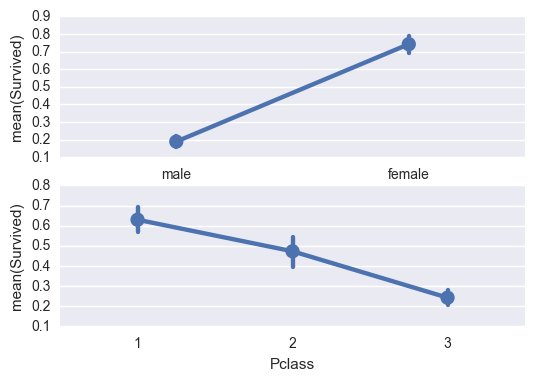

In [89]:
# 1. Visualize Survive by Pclass and Sex

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.factorplot('Sex','Survived', data=df, ax=ax1)
plt.close()

g=sns.factorplot('Pclass','Survived', data=df, ax=ax2)
plt.close()
plt.show()

The above graphs confirm with historical facts that female is more likely to survive. There is positive correlation between class level and survival rate.

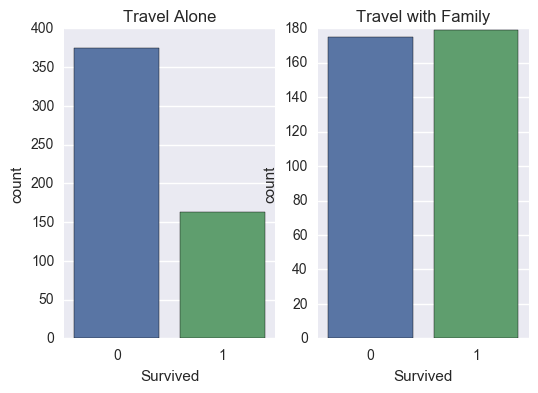

In [79]:
# 2. Compare Survive counts by Travel Alone and Travel with Family
df_alone=df[(df.SibSp==0)&(df.Parch==0)]
df_family=df[(df.SibSp>0)|(df.Parch>0)]

fig, (ax1,ax2) =plt.subplots(ncols=2,sharex=True)

sns.countplot(x='Survived', data=df_alone, ax=ax1)
sns.countplot(x='Survived', data=df_family, ax=ax2)
ax1.title.set_text('Travel Alone')
ax2.title.set_text('Travel with Family')


It seems that travel with family is more likely to survive than travel alone.

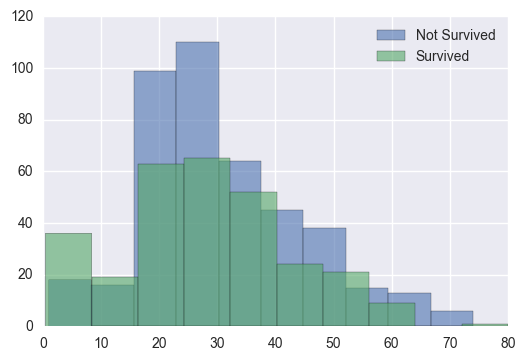

In [98]:
# 3. Compare Survive by Age group
df_age = df[np.isfinite(df['Age'])]
plt.hist(df_age[df_age["Survived"]==0]["Age"].reset_index(drop=True), alpha=0.6, label="Not Survived")
plt.hist(df_age[df_age["Survived"]==1]["Age"].reset_index(drop=True), alpha=0.6, label="Survived")
plt.legend()
plt.show()

(<matplotlib.figure.Figure at 0x119769b00>,
 OrderedDict([(('S', '0'),
               (0.0, 0.0, 0.7172370780385126, 0.66084067600751106)),
              (('S', '1'),
               (0.0,
                0.66416293514372371,
                0.7172370780385126,
                0.33583706485627624)),
              (('C', '0'),
               (0.7221875730880175,
                0.0,
                0.1871053247056989,
                0.44494542002847648)),
              (('C', '1'),
               (0.7221875730880175,
                0.44826767916468913,
                0.1871053247056989,
                0.55173232083531087)),
              (('Q', '0'),
               (0.9142433928432214,
                0.0,
                0.08575660715677863,
                0.60836173792984416)),
              (('Q', '1'),
               (0.9142433928432214,
                0.61168399706605681,
                0.08575660715677863,
                0.38831600293394314))]))

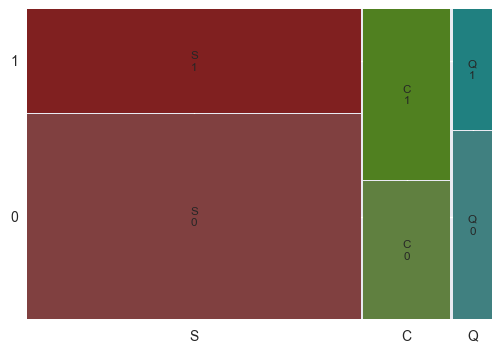

In [83]:
# 4. Compare Survive counts among three embark stations
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Embarked','Survived'])

The embark station categorized as "C" seems have higher survive rate comparing with other two stations, which makes me wonder where are these three stations located. Is station C have more higher class level passengers or more female passengers?

### Question 2: 
**2a. What are the three embark stations located?**

**2b. What's the Pclass distribution among these stations?**

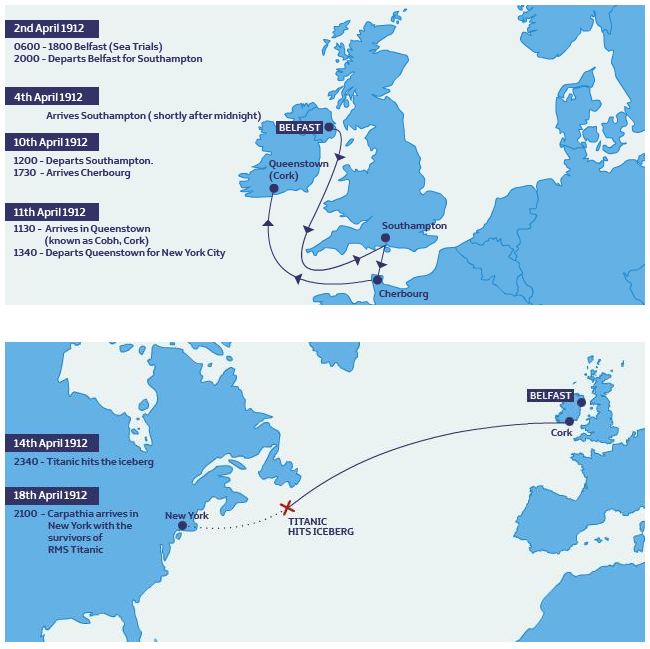

In [8]:
# 2a: Where are the 3 embark stations located?
from IPython.display import Image
Image(filename='Titanic_routeMap.png')

**In relation to our dataset**
1. **10th April, noon**: Titanic departs **Southampton, England**,which means that the people with "Embarked=S" aboarded first
2. **10th April, 17:30**: Titanic arrives in **Cherbourg,France** where John Jacob Astor (Titanic's richest passenger) and his 18 years old wife Madeleine on board. Our data shows that people boarded at Cherbourg (Embarked="C")did have higher survival rate compared to other two stations. The next step is to see further exam the Pclass composition.
3. **11th April, 13:30**: Titanic departs **Queestown, Ireland** for New York City
4. **15th April, 02:20**: Titanic begins to sink. Some believed that most people were sleeping is another reason of the tragedy loss.

-- [Image Source](https://www.discovernorthernireland.com/titanic/Titanic-Route-Map-A2196) --

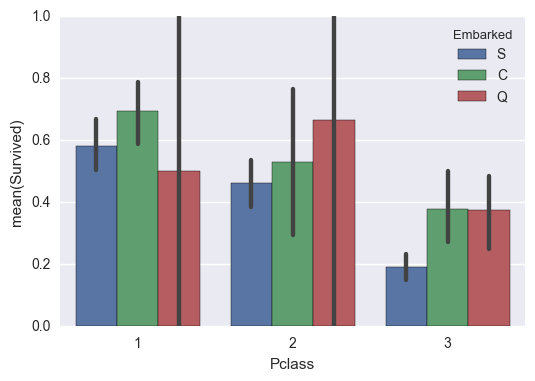

In [90]:
#2b. What's the Pclass distribution among these stations?

ax = sns.barplot(x="Pclass", y="Survived", hue="Embarked",data=df)

It is true that Cherboug stations with the most wealthy passengers.

### Question 3: What is the relationship between Pclass and Fare?

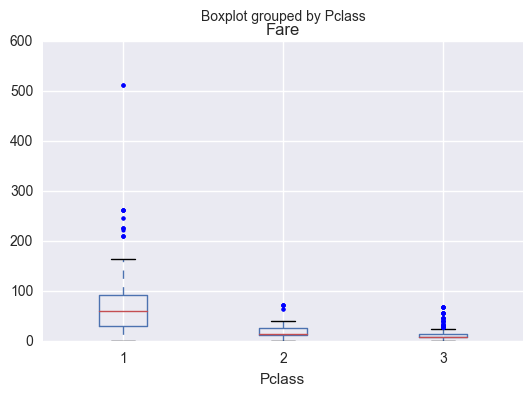

In [100]:
# boxplot to show the fare range by class, including outliers
df.boxplot('Fare', by='Pclass', sym='k.')

(0, 180)

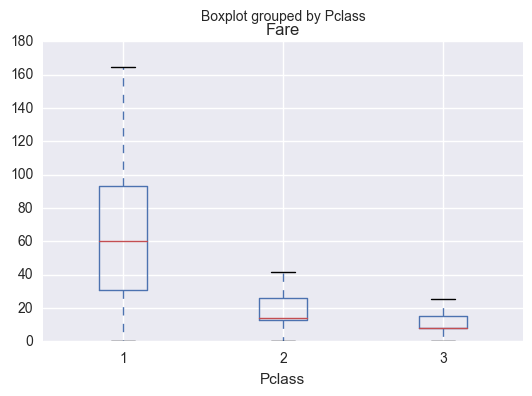

In [102]:
# A closer look for range between 0 and 180
df.boxplot('Fare', by='Pclass')
plt.ylim(0,180)

It seems that fare is positively correlated to Pclass. One thing to be noticed that Fare with zero values can be found among all three classes.
The next step is to find out what's in common for those free tickets.

In [108]:
df_free=df[df.Fare==0]
df_free.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,15,15,15,3,15
unique,15,1,10,3,1
top,"Cunningham, Mr. Alfred Fleming",male,LINE,A36,S
freq,1,15,4,1,15


It seems that people travel by free ticket are all male, and they all embarked at the same station. After googling the top name Cunningham, Mr.Alfred Fleming, The most frequent Ticket "LINE" belongs to crew member.

In [109]:
# Since there are only 15 records, print out all
df_free

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Another google results revealed that possible explanination for free ticket: Parr,Mr William Henry Marsh, was one of the employees chosen to oversee the Titanic's mainden voyage.

 # Step 3: Conclusions
 
After examing the Titanic dataset in varies aspects, now we can add more details to the below questions:
* What are the most prominant categorical factors correlated to survived passengers?
  - Pclass, Gender (strong correlated)
  - Age, Embarked Station (correlated)
  - Travel with family does improve the survive chance
* What are the three embark stations located? And what's the Pclass distribution among these stations?
  - The location can be refered to the Titanic Route Map
  - The higher survive rate observed at Embarked station Cherboug is likely due to the fairly large proportion of wealthy(Pclass=1) passengers
* What is the relationship between Pclass and Fare?
  - Though a small overlap can be observed among different Pclass levels, Fare is positively correlated to Pclass level: the higher the Pclass level, the higher the Fare.
  - There are 15 people traveled with free ticket, and most of them are crew.

# Reference
### History Facts
[Encyclopedia Titanic](https://www.encyclopedia-titanica.org/titanic-victim/william-henry-marsh-parr.html)
### Blog
[Exploring Survival on the Titanic Dataset](https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic/discussion)
[Titanic best working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier/discussion)
[中继点](http://zjdian.com/2014/09/17/2014-09-17-kaggle-titanic)
### Image
[Titanic Route Map](https://www.discovernorthernireland.com/titanic/Titanic-Route-Map-A2196)